# Data Exploration 02

You're working as a data analyst at a cereal marketing company in New York. 

In a strategy meeting, the marketing director tells you that in 2018, the US weight loss industry was worth over $72 Billion dollars, growing 4% compared to the previous year.

In contrast, sales of cold cereal fell 6% to $8.5 billion during the same time period.

Cereal executives have approached the marketing company asking how they can somehow tap into the weight loss market growth to boost the sales of their cereal brands.

Your assignment is to analyze a dataset of nutritional information for major US cereals, and calculate some metrics that can be used by the marketing team.

## Part 1: Import Pandas and load the data

Remember to import Pandas the conventional way. If you've forgotten how, you may want to review [Data Exploration 01](https://byui-cse.github.io/cse450-course/module-01/exploration-01.html).

The dataset for this exploration is stored at the following url:

`https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/cereal.csv`

There are lots of ways to load data into your workspace. The easiest way in this case is to [ask Pandas to do it for you](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html).

### Initial Data Analysis
Once you've loaded the data, it's a good idea to poke around a little bit to find out what you're dealing with.

Some questions you might ask include:

* What does the data look like?
* What kind of data is in each column? 
* Do any of the columns have missing values? 

In [1]:
# Part 1: Enter your code below to import Pandas according to the 
# conventional method. Then load the dataset into a Pandas dataframe.
import pandas as pd
cereal = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/cereal.csv')

# Write any code needed to explore the data by seeing what the first few 
# rows look like. Then display a technical summary of the data to determine
# the data types of each column, and which columns have missing data.
cereal.info()
cereal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


## Part 2: Calculate Summary Statistics

The marketing team has determined that when choosing a cereal, consumers are most interested in `calories`, `sugar`, `fiber`, `fat`, and `protein`.

First, let's calcuate some summary statistics for these categories across the entire dataset. We're particularly intrested in the mean, median, standard deviation, min, and max values. 

There are [multiple ways to accomplish this](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html).

In [2]:
# Part 2: Enter your code below to calculate summary statistics for the 
# calories, sugar, fiber, fat, and protein columns.

# The describe() function gives us almost everything we need (and more), but 
# doesn't include the median
cereal[ ['calories', 'sugars', 'fiber', 'fat', 'protein'] ].describe()

,calories,sugars,fiber,fat,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,6.922078,2.151948,1.012987,2.545455
std,19.484119,4.444885,2.383364,1.006473,1.094790
min,50.000000,-1.000000,0.000000,0.000000,1.000000
25%,100.000000,3.000000,1.000000,0.000000,2.000000
50%,110.000000,7.000000,2.000000,1.000000,3.000000
75%,110.000000,11.000000,3.000000,2.000000,3.000000
max,160.000000,15.000000,14.000000,5.000000,6.000000


In [3]:
# We can get the median separately this way:
cereal[ ['calories', 'sugars', 'fiber', 'fat', 'protein'] ].median()


calories    110.0
sugars        7.0
fiber         2.0
fat           1.0
protein       3.0
dtype: float64

In [4]:
# Or we can ask for exactly what we want using the aggregate function:
cereal[ ['calories', 'sugars', 'fiber', 'fat', 'protein'] ].agg(['mean', 'median', 'std', 'min', 'max'])

,calories,sugars,fiber,fat,protein
mean,106.883117,6.922078,2.151948,1.012987,2.545455
median,110.000000,7.000000,2.000000,1.000000,3.000000
std,19.484119,4.444885,2.383364,1.006473,1.094790
min,50.000000,-1.000000,0.000000,0.000000,1.000000
max,160.000000,15.000000,14.000000,5.000000,6.000000


## Part 3: Transform Data

To make analysis easier, you want to convert the manufacturer codes used in the dataset to the manufacturer names. 

First, display the count of each manufacturer code value used in the dataset (found in the `mfr` column). 

Then, [create a new column with the appropriate manufacturer name for each entry](https://pandas.pydata.org/docs/getting_started/intro_tutorials/10_text_data.html), using this mapping:

    A = American Home Food Products
    G = General Mills
    K = Kelloggs
    N = Nabisco
    P = Post
    Q = Quaker Oats
    R = Ralston Purina

> Note: While the tutorial linked above uses the [`replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) function, using the [`map`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function instead can often be much faster and more memory efficient, especially for large datasets.

In [5]:
# Display the count of values for the manufacturer code ("mfr" column), then 
# create a new column containing the appropriate manufacturer names.

# See which manufacturer codes we have
cereal['mfr'].value_counts()

K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: mfr, dtype: int64

In [6]:
# Now do the mapping (could also use replace() instead of map(), but map is faster)
cereal['mfr_name'] = cereal['mfr'].map({
    'A' : 'American Home Food Products',
    'G' : 'General Mills',
    'K' : 'Kelloggs',
    'N' : 'Nabisco',
    'P' : 'Post',
    'Q' : 'Quaker Oats',
    'R' : 'Ralston Purina'})

# Check a few rows to see if it worked
cereal[['name', 'mfr', 'mfr_name']].head(20)

,name,mfr,mfr_name
0,100% Bran,N,Nabisco
1,100% Natural Bran,Q,Quaker Oats
2,All-Bran,K,Kelloggs
3,All-Bran with Extra Fiber,K,Kelloggs
4,Almond Delight,R,Ralston Purina
5,Apple Cinnamon Cheerios,G,General Mills
6,Apple Jacks,K,Kelloggs
7,Basic 4,G,General Mills
8,Bran Chex,R,Ralston Purina
9,Bran Flakes,P,Post


## Part 4: Visualization 

Let's do some more data exploration visually.

First, as you did in [Data Exploration 01](https://byui-cse.github.io/cse450-course/module-01/exploration-01.html), import the Seaborn library the conventional way, and optionally set some [default chart aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html).

In [7]:
# Import the seaborn library the conventional way. Then optionally configure
# the default chart style.
import seaborn as sns
sns.set()
sns.set_style('ticks')

### Sugar Distribution

Marketing tells us that their surveys have revealed that sugar content is the number one concern of consumers when choosing cereal.

They would like to see the following visualizations:

*  A [distribution plot](https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions) of the sugar content in all cereals.

* A [scatter plot](https://seaborn.pydata.org/tutorial/categorical.html#categorical-scatterplots) showing the distribution of sugar content by manufactuerer.

* A [box plot](https://seaborn.pydata.org/tutorial/categorical.html#boxplots) showing the distribution of sugar content by manufacturer.

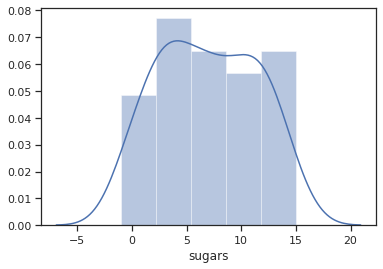

In [8]:
# Use seaborn to create the three visualzations requested by the the marketing team

# The distribution plot just uses default settings
sns.distplot(cereal['sugars'])

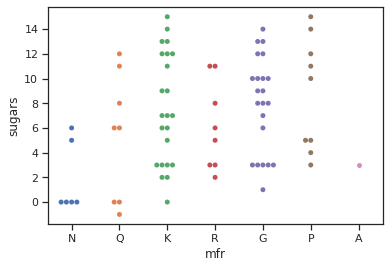

In [9]:
# We'll use the swarm variation 
sns.swarmplot(data=cereal, x='mfr', y='sugars')


Text(0, 0.5, 'Sugar (grams)')

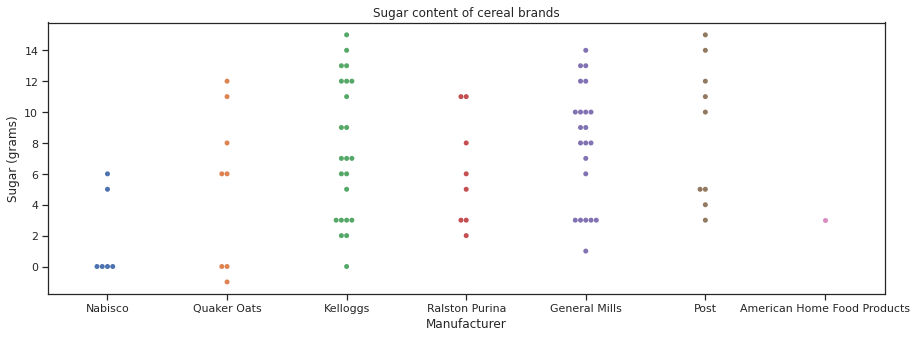

In [10]:
# Let's make this look nicer for marketing. Seaborn is based on matplotlib
# and its graph functions typically return a matplot lib Axes object
# which we can customize further. (see https://matplotlib.org/3.3.1/api/axes_api.html)

import matplotlib.pyplot as plt

# First, let's make it wider so we can use the manufacturer name instead
# of the code. We have to set this before drawing the chart.
plt.figure(figsize=(15,5))

# Draw that chart, keeping a reference to the axes object
ax = sns.swarmplot(data=cereal, x='mfr_name', y='sugars')

# Once the chart is drawn, we can set the labels
ax.set_title('Sugar content of cereal brands')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Sugar (grams)')


Text(0, 0.5, 'Sugar (grams)')

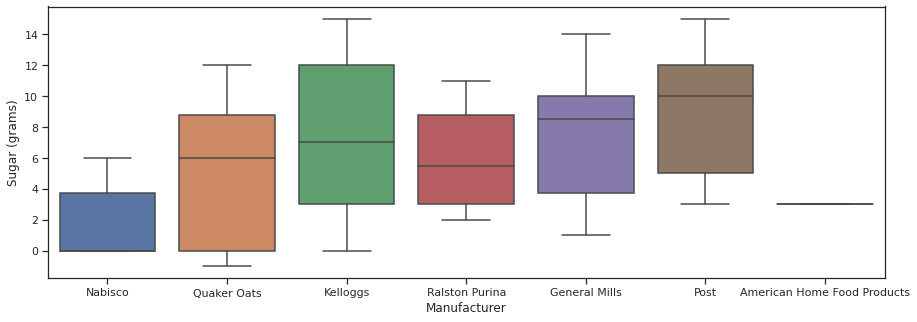

In [11]:
# Now here's the boxchart
plt.figure(figsize=(15,5))

ax = sns.boxplot(data=cereal, x='mfr_name', y='sugars')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Sugar (grams)')

# Part 5: Dietary Calculations

The marketing team has been able to arrange a partnership between the popular Weight Watchers diet brand and Kelloggs cereal.

The [Weight Watchers system](https://www.weightwatchers.com/us/how-it-works/smartpoints) assigns a point value to each food, and participants in the program are allotted a certain number of points each day.

One [recent formula](http://www.exercise4weightloss.com/smart-points-calculator.html) for calculating points is:

    (Calories * .0305) + (Fat * .275) + (Sugar * .12) - (Protein * .098)

First, [select a subset of the data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#how-do-i-filter-specific-rows-from-a-dataframe) containing just cereals manufactured by Kellogs.

Then, [add a new column](https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html) with the Weight Watchers point calculation derived from the data for each of that manufacturer's cereal brands.

Finally, calculate the same summary statistics for the points calculations as earlier (mean, median, standard deviation, min, and max).

In [12]:
# First, filter the dataset to include only cereals manufactured by Kellogs
kellogs = cereal[ cereal['mfr'] == 'K' ].copy()

# Note the addition of the "copy()" command at the end. This is to prevent
# a SettingWithCopyWarning that Pandas will throw at us if we accidentally
# perform a "chained assignment" operation. 
#
# There are two ways to fix this. One is to use a copy of the data instead, 
# which is what we've done here. This works fine if your dataset is small
# (this one is).
#
# The other is to use loc() for indexing instead:
#
#   cereal.loc[ cereal['mfr'] == 'K', 'name': 'mfr_name' ]
#
# This basically says: give me the row locations in the data where mfr is equal to K and 
# include all columns between name and mfr_name (inclusive)
#
# The docs give a small warning at the end here about this: 
# https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html
#
# For an overview of this problem (which is quote common) see this article:
# https://www.dataquest.io/blog/settingwithcopywarning/
#
# For the technical details, read the Pandas docs section on views vs copies: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Finally, add a new column containing the Weight Watchers point calculations
kellogs['WW Points'] = (kellogs['calories'] * .0305) + (kellogs['fat'] * .275) + (kellogs['sugars'] * .12) + (kellogs['protein'] * .098)
kellogs[ ['name', 'WW Points', 'calories', 'fat', 'sugars', 'protein'] ].head()

,name,WW Points,calories,fat,sugars,protein
2,All-Bran,3.402,70,1,5,4
3,All-Bran with Extra Fiber,1.917,50,0,0,4
6,Apple Jacks,5.231,110,0,14,2
16,Corn Flakes,3.486,100,0,2,2
17,Corn Pops,4.893,110,0,12,1


## 🌟 Above and Beyond 🌟

The marketing team is pleased with what you've accomplished so far. They have a meeting with top cereal executives in the morning, and they'd like you to do as many of the following additional tasks as you have time for:

1. Weight Watchers used to have an older points system that used this formula: `(calories / 50) + (fat / 12) - (fiber / 5)`, but only the first 4 grams of fiber were included in the calculation. For comparison's sake, create an additional column with the calculation for the old points system.

2. Marketing really likes the boxplot of the sugar content for each cereal, but they'd like it if you could create another version of the plot [with the outliers labeled](https://stackoverflow.com/questions/61734304/label-outliers-in-a-boxplot-python).